<a href="https://colab.research.google.com/github/zainabbio/Youtube-Tutorials/blob/main/Exploratory_Data_Analysis_with_Unsupervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reference and Acknowledgment:**
This Google Colab notebook is prepared based on the book Computational Genomics with R by Altuna Akalin. Please refer to the book for more in-depth explanations and examples.

Here is the link for the book: https://compgenomr.github.io/book/

# **Machine Learning to explore Genomics Data**

# **1) Clustering**

**Introduction to Clustering**

**Definition:**
Clustering is a technique used to group similar objects based on predefined criteria, aiming to maximize intra-group similarity and minimize inter-group similarity.

**Purpose in Genomics:** Identify patterns in gene expression, genetic mutations, or clinical data by grouping samples with similar profiles.

**Application Examples:**

Identifying gene expression patterns across different treatment groups.

Grouping patients with similar diseases based on their gene expression profiles.

Finding subtypes of diseases based on molecular characteristics.

**Clustering Workflow**

**Step 1: Defining Similarity/Dissimilarity**

Distance Metric: The key to clustering; defines how we measure the 'closeness' of samples.

Common distance metrics include:

Euclidean Distance: Suitable for continuous data like gene expression levels.

Manhattan Distance: Useful for data with large outliers.

Correlation-based Metrics: Measures similarity based on expression patterns (e.g., Pearson correlation).

Choosing the Right Metric: Depends on the nature of the data and the research question.

**Step 2: Choosing Clustering Algorithms**

Hierarchical Clustering: Builds a tree-like structure (dendrogram), useful for exploring hierarchical relationships.

K-means Clustering: Partitions the data into a predefined number of clusters, useful when the number of groups is known.

DBSCAN: Density-based clustering, good for finding clusters of arbitrary shape and handling noise.

Gaussian Mixture Models (GMM): Assumes the data is generated from a mixture of several Gaussian distributions.

**Step 3: Visualizing Clusters**

Heatmaps: Display gene expression data in clusters to show similarities visually.

t-SNE/UMAP: Dimensionality reduction techniques to visualize clusters in a 2D or 3D space.

**Step 1) Distance metrics**

In [2]:
# Creating the dataset
data <- data.frame(
  IRX1 = c(5, 8, 3, 2),
  OCT2 = c(11, 15, 6, 9),
  PAX7 = c(2, 4, 12, 7)
)

# Adding row names for patients
rownames(data) <- c("patient1", "patient2", "patient3", "patient4")

# Viewing the data
print(data)

         IRX1 OCT2 PAX7
patient1    5   11    2
patient2    8   15    4
patient3    3    6   12
patient4    2    9    7


Next, we calculate the distance metrics using the dist() function and 1-cor() expression.

In [3]:
dist(data,method="manhattan")

         patient1 patient2 patient3
patient2        9                  
patient3       17       22         
patient4       10       15        9

In [4]:
dist(data,method="euclidean")

          patient1  patient2  patient3
patient2  5.385165                    
patient3 11.357817 13.038405          
patient4  6.164414  9.000000  5.916080

In [5]:
as.dist(1-cor(t(data))) # correlation distance

             patient1     patient2     patient3
patient2 0.0005762029                          
patient3 1.5000000000 1.5291067161             
patient4 0.5460793505 0.5765848408 0.4552952206

**1.1 Scaling before calculating the distance**

Before performing clustering, it’s important to consider whether to normalize or scale your data, as the scale of gene expression values can influence distance calculations.

If gene expression values vary widely in magnitude, scaling (standardizing) the data—by subtracting the mean and dividing by the standard deviation—ensures each gene contributes equally to the distance metric.

However, if the data is already normalized or if certain genes’ larger effects are biologically meaningful, scaling may not be necessary.

In R, scaling is done using the scale() function.

In [6]:
data

,IRX1,OCT2,PAX7
,<dbl>,<dbl>,<dbl>
patient1,5,11,2
patient2,8,15,4
patient3,3,6,12
patient4,2,9,7


In [7]:
scale(data)

,IRX1,OCT2,PAX7
patient1,0.1889822,0.1986799,-0.9771621
patient2,1.3228757,1.2583057,-0.5173211
patient3,-0.5669467,-1.1258525,1.3220429
patient4,-0.9449112,-0.3311331,0.1724404


**2) Hiearchical clustering**

Hierarchical clustering is a common algorithm used to group similar data points together.

It works by starting with each data point as its own small cluster and then gradually combining clusters based on their distance from each other.

As the clusters are merged, a tree-like diagram called a dendrogram is created, which shows how the data points and clusters are related.

The height of the branches in the dendrogram represents how far apart the clusters are.

 In R, the hclust() function is used for hierarchical clustering, and it can be applied on distance measurements, like Euclidean distance, between patients.

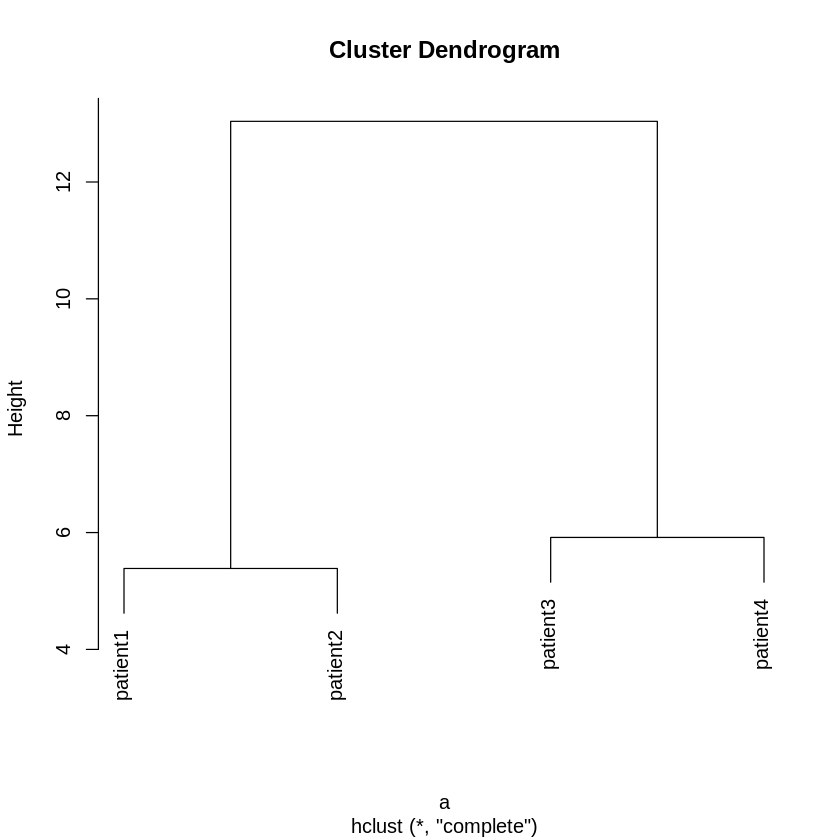

In [8]:
a=dist(data)
hc=hclust(a,method="complete")
plot(hc)

Here, we will create a random expression matrix that simulates gene expression data, with the rows representing genes and the columns representing samples. The annotation_col will assign leukemia types to each sample.

How this code will work:

**Data Generation:**

mat <- matrix(rnorm(50), nrow = 10, ncol = 5) generates a 10x5 matrix of random numbers, which represent gene expression values. Each row corresponds to a gene, and each column corresponds to a sample.

rownames(mat) <- paste("Gene", 1:10, sep = "") assigns names to the rows (genes).

colnames(mat) <- paste("Sample", 1:5, sep = "") assigns names to the columns (samples).

**Annotation:**

The annotation_col data frame holds the type for each sample. Here, we assign "AML" or "ALL" to the samples to simulate different types.

**Heatmap Generation:**

pheatmap(mat, ...) generates the heatmap, with the options:
show_rownames = TRUE and show_colnames = TRUE display the gene and sample names.

annotation_col = annotation_col adds the leukemia type annotation to the heatmap.

clustering_method = "ward.D2" and clustering_distance_cols = "euclidean" perform hierarchical clustering based on Euclidean distance.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



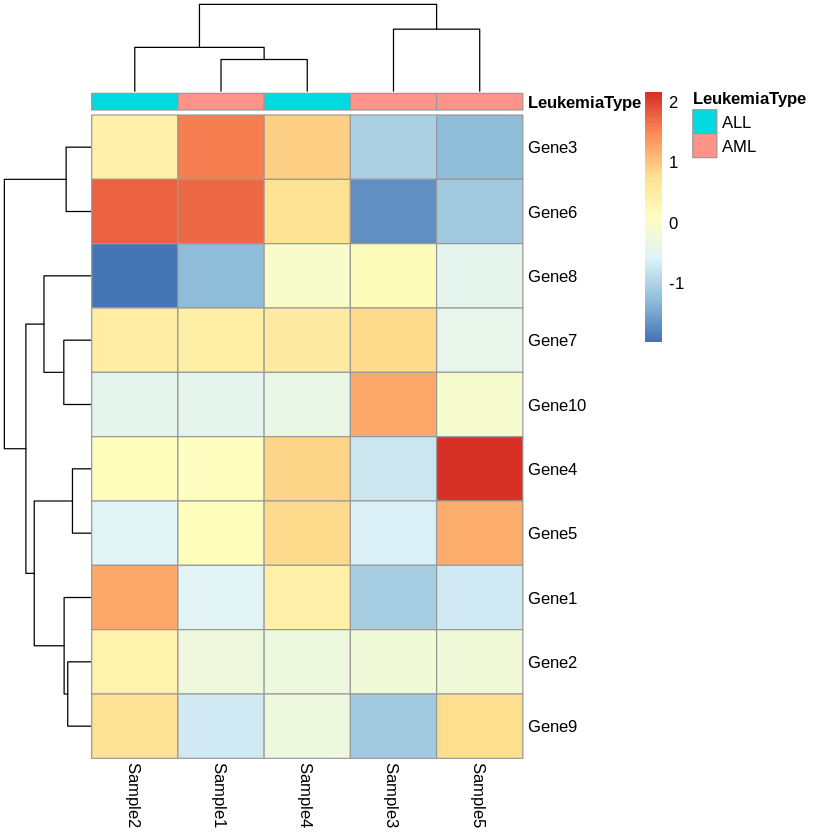

In [11]:
# Load the pheatmap package
install.packages("pheatmap")
library(pheatmap)

# Create an example gene expression matrix with 10 genes and 5 samples
set.seed(123)  # For reproducibility
mat <- matrix(rnorm(50), nrow = 10, ncol = 5)  # 10 genes x 5 samples
rownames(mat) <- paste("Gene", 1:10, sep = "")
colnames(mat) <- paste("Sample", 1:5, sep = "")

# Set the leukemia type annotation for each sample (e.g., AML or ALL)
annotation_col = data.frame(
  LeukemiaType = c("AML", "ALL", "AML", "ALL", "AML")
)
rownames(annotation_col) <- colnames(mat)

# Generate the heatmap
pheatmap(mat,
         show_rownames = TRUE,
         show_colnames = TRUE,
         annotation_col = annotation_col,
         scale = "none",
         clustering_method = "ward.D2",
         clustering_distance_cols = "euclidean")


**2.1 Where to cut the tree ?**

In hierarchical clustering, cutting the tree (also known as the dendrogram) is the step where you decide how many clusters you want to extract from the data. This is typically done by setting a threshold for the height at which the tree should be cut, which represents the distance at which clusters should be merged.

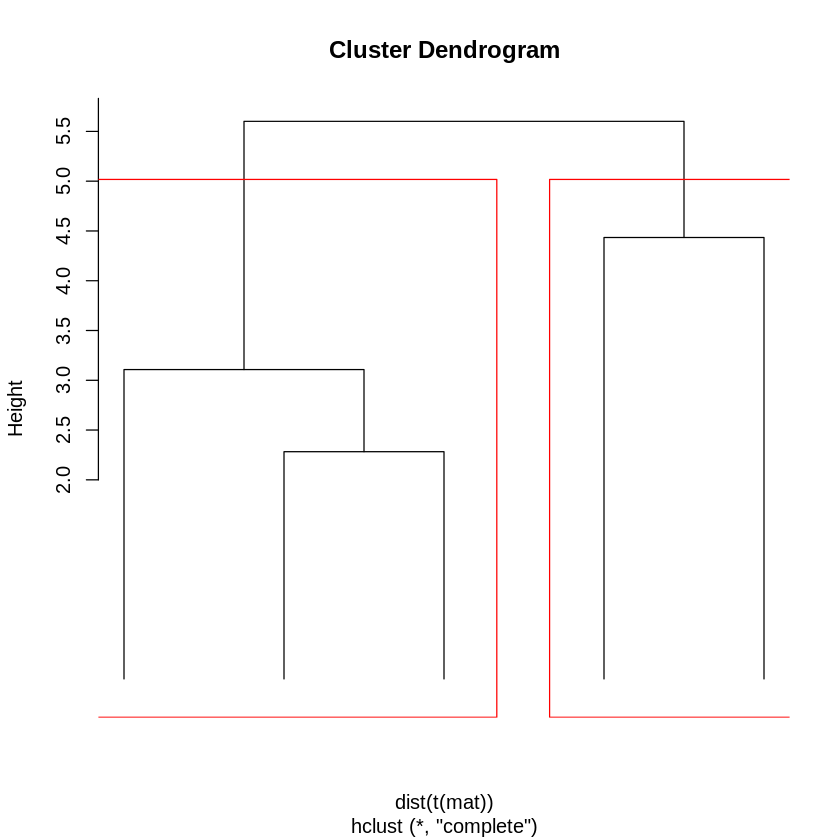

In [12]:
hcl=hclust(dist(t(mat)))
plot(hcl,labels = FALSE, hang= -1)
rect.hclust(hcl, h = 80, border = "red")

**2) K-means clustering**

K-means is a very popular clustering method that groups data points (like patients in your example) into a specific number of clusters, called "k" clusters.

**Step-by-Step Process:**

**Choosing the number of clusters (k):** First, you decide how many clusters you want to divide your data into. For example, you might decide to divide your patients into 3 clusters (k=3).

**Randomly picking initial centroids:** The algorithm starts by choosing "k" random points in the data as the initial "centroids" (these are like the center points of each cluster). In your case, each centroid would have random gene expression values based on the real data.

**Assigning data points to centroids:** Once the centroids are chosen, the algorithm assigns each patient (data point) to the closest centroid based on their gene expression values. So, patients who are similar to each other will be grouped in the same cluster.

**Re-calculating centroids:** After assigning patients to clusters, the algorithm calculates a new centroid for each cluster. This new centroid is the average of all the patients in that cluster.

**Repeating the process:** The algorithm then repeats the process of assigning patients to the new centroids and recalculating centroids. It continues doing this until the centroids don’t change much anymore, meaning the clusters are stable.

**Minimizing distance:** The goal of the algorithm is to minimize the distance between the patients and their cluster centroids, making sure that similar patients are grouped together.

**Key Things to Know:**

**1) Random initialization:** The centroids start off randomly, which means the results can change each time you run the algorithm. That’s why it’s often a good idea to run it multiple times to make sure the results are stable.

**2) Fixed number of clusters:** You need to decide on the number of clusters, "k", before starting. This is one of the key choices you have to make in the process.

**3) Iterations:** The algorithm repeats the steps (assigning patients to centroids and recalculating centroids) until the clusters are stable.

            [,1]       [,2]       [,3]       [,4]       [,5]
 [1,] -0.3260365  0.5264481 -0.1637557  0.8949372  0.4824588
 [2,]  0.5524619 -0.7948444  0.7085221  0.2791520  0.7582138
 [3,] -0.6749438  1.4277555 -0.2679805  1.0078658 -2.3193274
 [4,]  0.2143595 -1.4668197 -1.4639218 -2.0731065 -0.4595048
 [5,]  0.3107692 -0.2366834  0.7444358  1.1898534 -1.1053837
 [6,]  1.1739663 -0.1933380 -1.4103902 -0.7243742  0.4029283
 [7,]  0.6187899 -0.8497547  0.4670676  0.1679838  0.5689349
 [8,] -0.1127343  0.0584655 -0.1193201  0.9203352 -0.7060833
 [9,]  0.9170283 -0.8176704  0.4672390 -1.6716048 -0.2900906
[10,] -0.2232594 -2.0503078  0.4981356  0.4484691 -1.4838781
           [,1]       [,2]       [,3]       [,4]       [,5]       [,6]
[1,] -0.3260365  0.5524619 -0.6749438  0.2143595  0.3107692  1.1739663
[2,]  0.5264481 -0.7948444  1.4277555 -1.4668197 -0.2366834 -0.1933380
[3,] -0.1637557  0.7085221 -0.2679805 -1.4639218  0.7444358 -1.4103902
[4,]  0.8949372  0.2791520  1.0078658 -2.0731

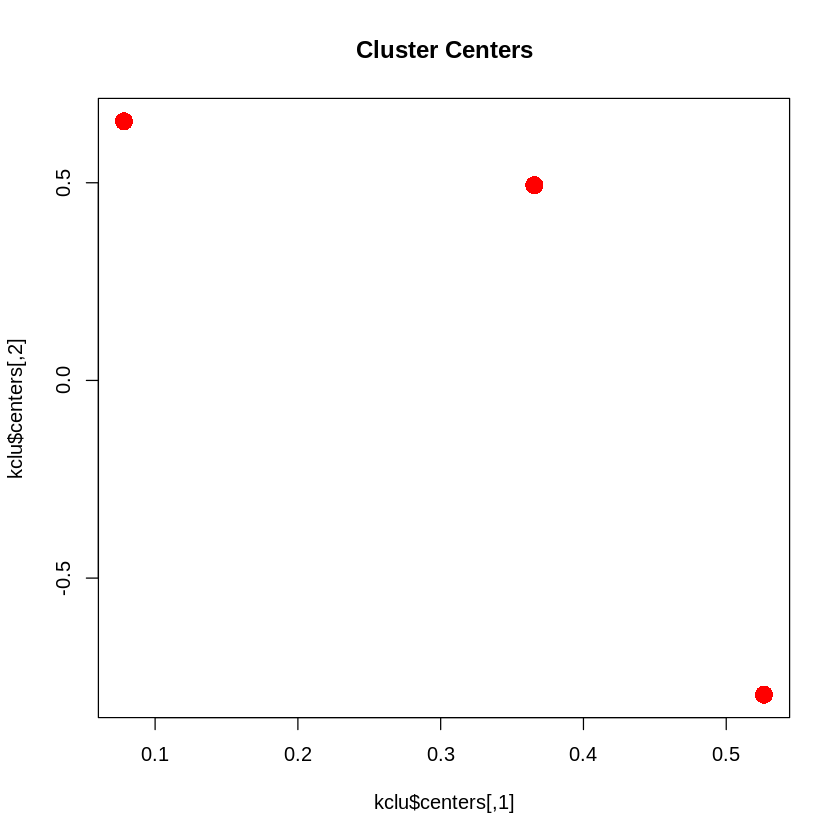

In [19]:
# Set seed for reproducibility
set.seed(101)

# Create a synthetic gene expression matrix with 5 patients and 10 genes
# Rows = Genes (10), Columns = Patients (5)
mat <- matrix(rnorm(50), nrow = 10, ncol = 5)

# Check the matrix structure
print(mat)

# Transpose the matrix to have patients as rows (required by kmeans)
mat_transposed <- t(mat)

# Check the transposed matrix structure
print(mat_transposed)

# Perform k-means clustering with 3 clusters (centers)
kclu <- kmeans(mat_transposed, centers = 3)

# Show the number of patients in each cluster
print(table(kclu$cluster))

# You can plot the result to visualize the clustering
plot(kclu$centers, col = "red", pch = 16, cex = 2, main = "Cluster Centers")

To calculate and visualize the percentage of each leukemia type in each cluster, we can follow these steps:

1) Simulate or assign leukemia types to your patients.

2) Check the percentage of each leukemia type in each cluster.

3) Visualize the results in a table format.

In [21]:
# Set seed for reproducibility
set.seed(101)

# Create synthetic gene expression matrix with 5 patients and 10 genes
mat <- matrix(rnorm(50), nrow = 10, ncol = 5)

# Transpose the matrix so that rows represent patients
mat_transposed <- t(mat)

# Perform k-means clustering with 3 clusters
kclu <- kmeans(mat_transposed, centers = 3)

# Assign synthetic leukemia types to patients (5 patients)
leukemia_types <- c("AML", "ALL", "AML", "Control", "ALL")

# Now we will calculate the percentage of each leukemia type in each cluster
# Create a data frame of cluster assignments and leukemia types
cluster_data <- data.frame(Cluster = kclu$cluster, LeukemiaType = leukemia_types)

# Create a contingency table (cross-tabulate leukemia types and clusters)
contingency_table <- table(cluster_data$Cluster, cluster_data$LeukemiaType)

# Calculate the percentage of each leukemia type within each cluster
percentage_table <- prop.table(contingency_table, margin = 1) * 100

# Print the table showing the percentage of each leukemia type in each cluster
print(percentage_table)

   
    ALL AML Control
  1 100   0       0
  2   0  50      50
  3  50  50       0


To perform k-medoids clustering in R, we can use the pam() function from the cluster package. As you correctly mentioned, k-medoids is similar to k-means but with a few key differences:

1) Centroids in k-medoids are actual data points (i.e., patients in your case), unlike k-means where centroids are computed as the mean of all points in the cluster.

2) The distance metric used in k-medoids is typically Manhattan distance (L1 distance) rather than Euclidean distance (L2 distance) used in k-means.

**Step-by-Step Guide to K-Medoids Clustering:**

**Install and load required packages:**

If you haven't already installed the cluster package, you can do so with the following code:

In [22]:
# Install and load the 'cluster' package for k-medoids clustering
install.packages("cluster")
library(cluster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Sample Data (Simulating gene expression data for 5 patients):**

In [23]:
# Simulated gene expression data for 5 patients and 10 genes
set.seed(123)
mat <- matrix(rnorm(50), nrow = 10, ncol = 5)

# Transpose matrix so that rows represent patients
mat_transposed <- t(mat)

**Performing K-Medoids Clustering:**

Now, we will perform k-medoids clustering with k = 3 clusters using the Manhattan distance.

In [24]:
# Perform k-medoids clustering with k = 3 clusters
kmedoids_result <- pam(mat_transposed, k = 3, metric = "manhattan")

# View the cluster assignments
kmedoids_result$clustering

[1] 1 1 2 1 3

**Analyzing Cluster Results:**

You can access the cluster assignments and the medoids (representative data points) for each cluster using the following commands:

In [25]:
# Cluster assignments (which patient belongs to which cluster)
kmedoids_result$clustering

# Medoids (actual data points that represent each cluster)
kmedoids_result$medoids

[1] 1 1 2 1 3

-0.5604756,-0.2301775,1.558708,0.07050839,0.1292877,1.715065,0.4609162,-1.2650612,-0.6868529,-0.44566197
-1.0678237,-0.2179749,-1.026004,-0.72889123,-0.6250393,-1.686693,0.8377870,0.1533731,-1.1381369,1.25381492
-0.6947070,-0.2079173,-1.265396,2.16895597,1.2079620,-1.123109,-0.4028848,-0.4666554,0.7799651,-0.08336907


Partitioning methods like k-means do not provide a tree structure, but we can visualize the distances between patients and clusters using dimensionality reduction techniques. One such method, multi-dimensional scaling (MDS), compresses patient distances into a 2D plot, allowing us to visualize cluster relationships.

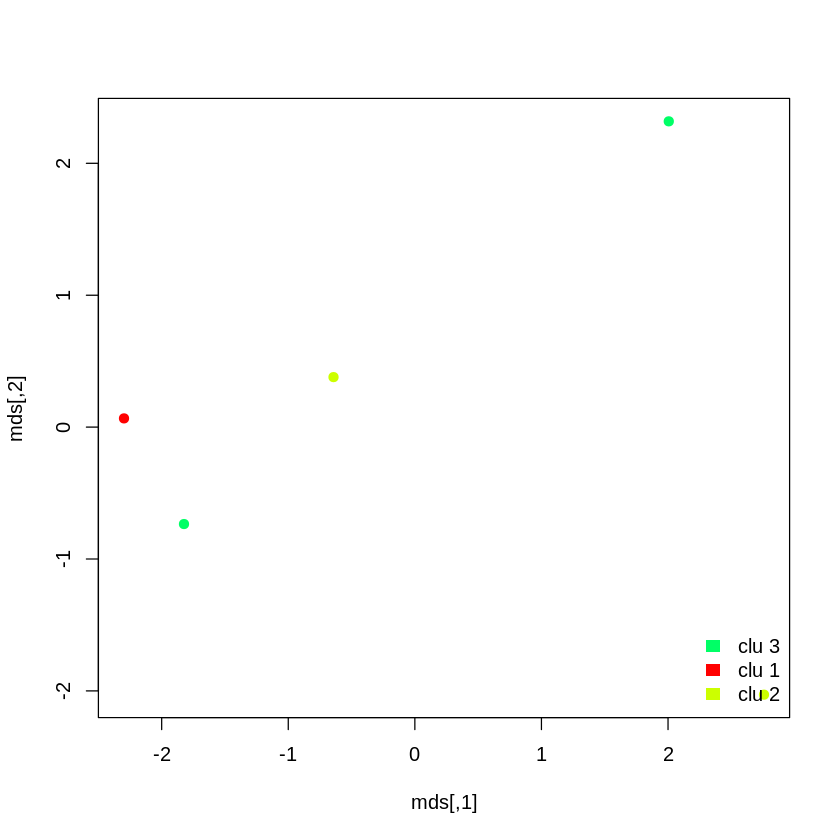

In [27]:
# Calculate distances
dists=dist(t(mat))

# calculate MDS
mds=cmdscale(dists)

# plot the patients in the 2D space
plot(mds,pch=19,col=rainbow(5)[kclu$cluster])

# set the legend for cluster colors
legend("bottomright",
       legend=paste("clu",unique(kclu$cluster)),
       fill=rainbow(5)[unique(kclu$cluster)],
       border=NA,box.col=NA)

**4) How to choose “k”, the number of clusters**